In [14]:
import tensorflow as tf
import tensorflow_hub as hub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [16]:
# !wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

In [19]:
# ! unzip 10_food_classes_10_percent.zip

In [20]:
TRAIN_PATH = "10_food_classes_10_percent/train"
TEST_PATH = "10_food_classes_10_percent/test"

In [21]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory(TRAIN_PATH,
                                              target_size=(224,224),
                                              batch_size=32,
                                              class_mode="categorical")
test_data = test_datagen.flow_from_directory(TEST_PATH,
                                            target_size=(224,224),
                                            batch_size=32,
                                            class_mode="categorical")

Found 750 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [22]:
# popular callbacks-
# tensorboard
# model checkpoint
# early stopping

In [23]:
# tensorboard callback
import datetime
def create_tensorboard_callback(dir_name, experiment_name):
    log_dir = dir_name + "/" + experiment_name + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
    tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir)
    print(f"Saving tensorboard logs to {log_dir}")
    return tensorboard_callback

In [24]:
resnet_url = "https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/5"
efficientnet_url = "https://tfhub.dev/google/efficientnet/b0/feature-vector/1"

In [25]:
def create_model(model_url, num_classes=10):
    base = hub.KerasLayer(model_url,
                         trainable=False,
                         name="base",
                         input_shape=(224,224,3),)
    model = tf.keras.models.Sequential()
    model.add(base)
    model.add(tf.keras.layers.Dense(10, activation="softmax", name="output_layer"))
    return model

In [26]:
resnet_model = create_model(resnet_url, 10)

In [27]:
resnet_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 base (KerasLayer)           (None, 2048)              23564800  
                                                                 
 output_layer (Dense)        (None, 10)                20490     
                                                                 
Total params: 23,585,290
Trainable params: 20,490
Non-trainable params: 23,564,800
_________________________________________________________________


In [28]:
resnet_model.compile(loss="categorical_crossentropy",
                    optimizer="adam",
                    metrics=["accuracy"])

In [29]:
resnet_history = resnet_model.fit(train_data,
                                 epochs=5,
                                 validation_data=test_data,
                                 callbacks=[create_tensorboard_callback(dir_name="tensorflow_hub", experiment_name="resnet50V2")])

Saving tensorboard logs to tensorflow_hub/resnet50V2/20230222-142734
Epoch 1/5
24/24 [==============================] - 22s 782ms/step - loss: 2.0439 - accuracy: 0.3240 - val_loss: 1.2476 - val_accuracy: 0.6088
Epoch 2/5
24/24 [==============================] - 17s 748ms/step - loss: 0.9426 - accuracy: 0.7133 - val_loss: 0.8501 - val_accuracy: 0.7276
Epoch 3/5
24/24 [==============================] - 17s 738ms/step - loss: 0.6247 - accuracy: 0.8160 - val_loss: 0.7706 - val_accuracy: 0.7512
Epoch 4/5
24/24 [==============================] - 25s 1s/step - loss: 0.4812 - accuracy: 0.8760 - val_loss: 0.7180 - val_accuracy: 0.7684
Epoch 5/5
24/24 [==============================] - 18s 758ms/step - loss: 0.3911 - accuracy: 0.9093 - val_loss: 0.6817 - val_accuracy: 0.7828


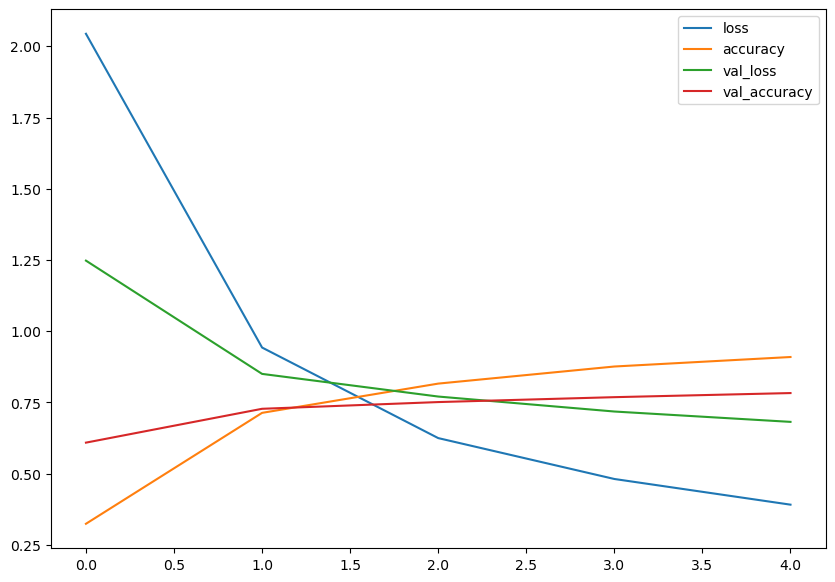

In [30]:
pd.DataFrame(resnet_history.history).plot(figsize=(10,7))
plt.show()

In [31]:
efficientnet_model = create_model(efficientnet_url, 10)

In [32]:
efficientnet_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 base (KerasLayer)           (None, 1280)              4049564   
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4,062,374
Trainable params: 12,810
Non-trainable params: 4,049,564
_________________________________________________________________


In [33]:
efficientnet_model.compile(loss="categorical_crossentropy",
                    optimizer="adam",
                    metrics=["accuracy"])

In [34]:
efficientnet_history = efficientnet_model.fit(train_data,
                                 epochs=5,
                                 validation_data=test_data,
                                 callbacks=[create_tensorboard_callback(dir_name="tensorflow_hub", experiment_name="efficientnet")])

Saving tensorboard logs to tensorflow_hub/efficientnet/20230222-142917
Epoch 1/5
24/24 [==============================] - 22s 778ms/step - loss: 1.9246 - accuracy: 0.4027 - val_loss: 1.3323 - val_accuracy: 0.7224
Epoch 2/5
24/24 [==============================] - 17s 715ms/step - loss: 1.0743 - accuracy: 0.7653 - val_loss: 0.8823 - val_accuracy: 0.8228
Epoch 3/5
24/24 [==============================] - 17s 710ms/step - loss: 0.7647 - accuracy: 0.8360 - val_loss: 0.7035 - val_accuracy: 0.8488
Epoch 4/5
24/24 [==============================] - 16s 705ms/step - loss: 0.6074 - accuracy: 0.8653 - val_loss: 0.6155 - val_accuracy: 0.8584
Epoch 5/5
24/24 [==============================] - 16s 707ms/step - loss: 0.5133 - accuracy: 0.8907 - val_loss: 0.5596 - val_accuracy: 0.8628


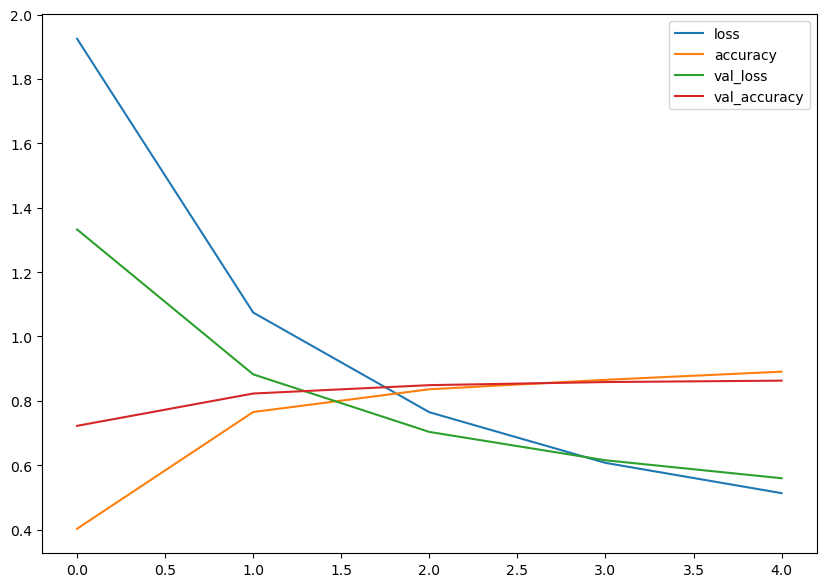

In [35]:
pd.DataFrame(efficientnet_history.history).plot(figsize=(10,7))
plt.show()

In [36]:
# Types of transfer learning-
# 1. As is -> Fit the pretrained model directly.
# 2. Feature extraction -> Adding some layers to the pretrained model and training the extra added layers only.
# 3 Fine tuning -> Taking a pretrained model, adding some layers to it and then training all, or some layers of the model.

In [42]:
# for tensorboard- 
# ! tensorboard dev upload --logdir ./tensorflow_hub/ \
#   --name "EfficientNet B0 vs ResNet50V2" \
#   --description "Comparing two different TF Hub feature extraction model architectures using 10% of the training data" \
#   --one_shot

In [43]:
# Check out experiments
# !tensorboard dev list

In [44]:
# Delete an experiment
# !tensorboard dev delete --experiment_id n6kd8XZ3Rdy1jSgSLH5WjA